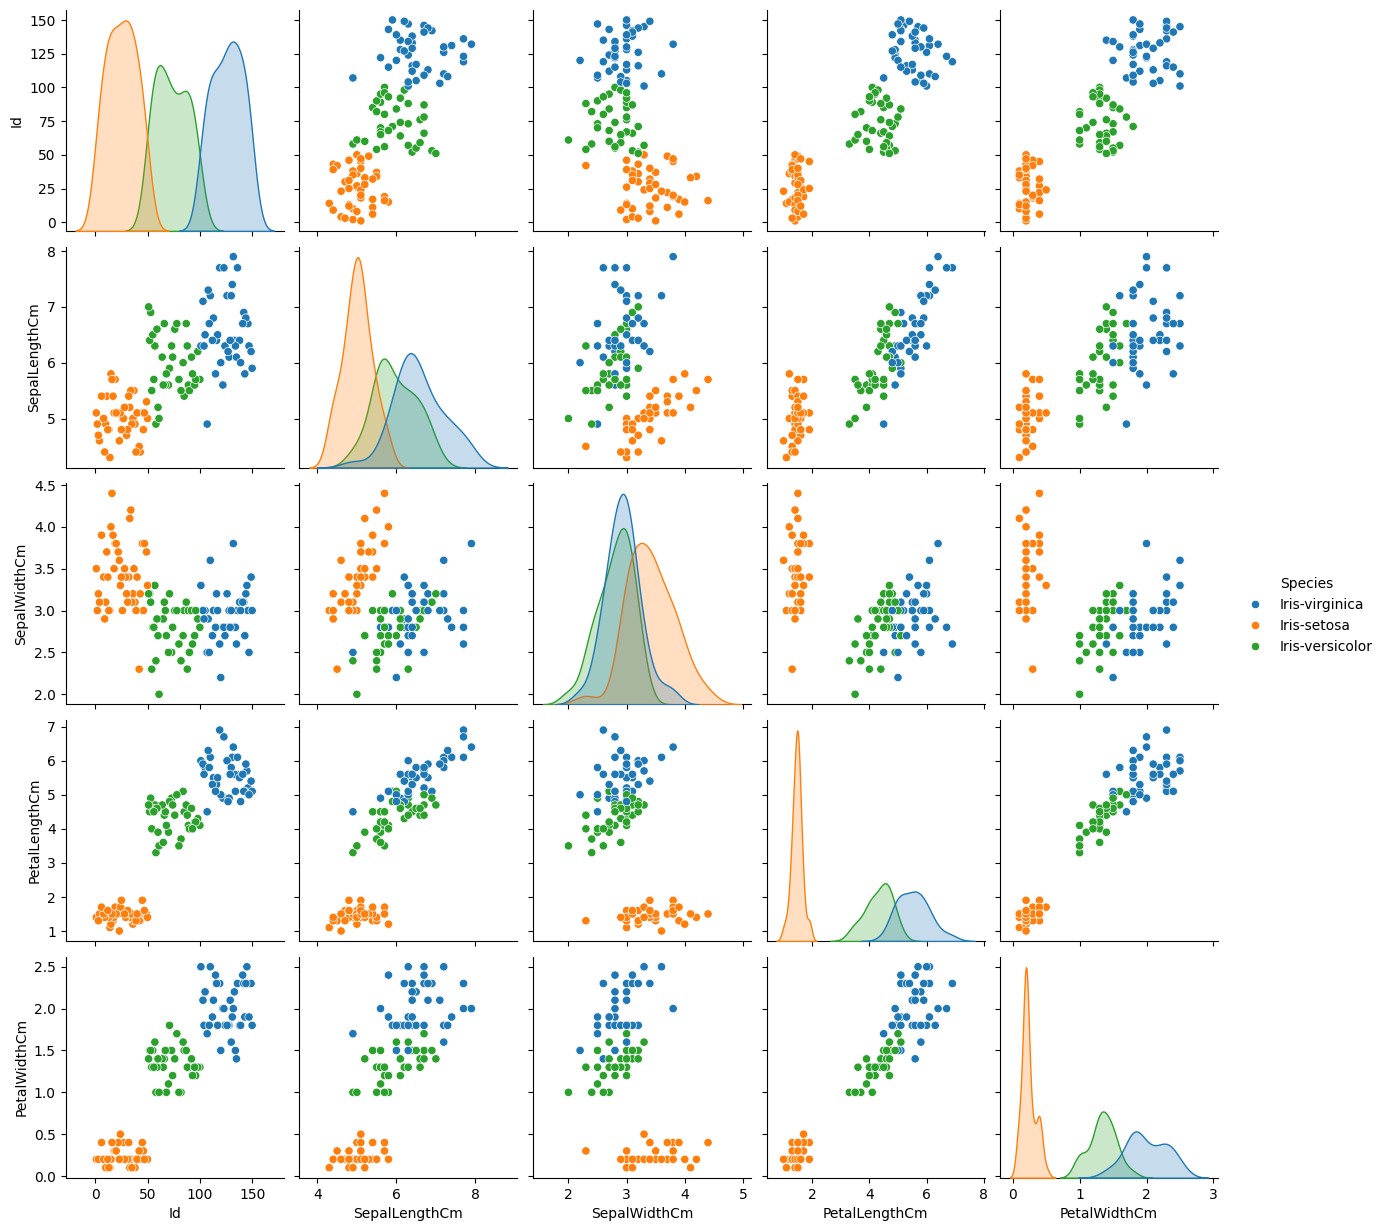

In [1]:
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
iris=pd.read_csv('iris.csv')
train,test=train_test_split(iris, test_size=0.2)

#making a copy without labels(species)
train_data=train.iloc[:, 0:4].values
test_data=test.iloc[:, 0:4].values

# CSV format :->
# Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
# 1,5.1,3.5,1.4,0.2,Iris-setosa
# 2,4.9,3.0,1.4,0.2,Iris-setosa
# 3,4.7,3.2,1.3,0.2,Iris-setosa
# 4,4.6,3.1,1.5,0.2,Iris-setosa
# 5,5.0,3.6,1.4,0.2,Iris-setosa
# 6,5.4,3.9,1.7,0.4,Iris-setosa
# 7,4.6,3.4,1.4,0.3,Iris-setosa

import seaborn as sns

#plotting the data
sns.pairplot(train, hue='Species')


Implement the K-means clustering algorithm (without using any in-built library
function) on the IRIS dataset (without considering the label-column). Report the
sum-square-error (SSE), silhouette coefficient, and the number of iterations required
for convergence (for different K values).

In [2]:
import matplotlib.pyplot as plt

X=iris.iloc[:, 1:5].values # removing id and species columns

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def kmeans(X, k, max_iters=100):
    centroids=X[np.random.choice(X.shape[0], k, replace=False)]
    print(centroids)
    
    for _ in range(max_iters):
        clusters=[[] for _ in range(k)]
        for point in X:
            distances=[euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx=np.argmin(distances)
            clusters[cluster_idx].append(point)
        
        new_centroids=[np.mean(cluster, axis=0) for cluster in clusters]
        
        if np.all([np.allclose(centroids[i], new_centroids[i]) for i in range(k)]):
            break
        
        centroids=new_centroids
    
    return centroids, clusters

def calculate_sse(centroids, clusters):
    sse=0
    for i, cluster in enumerate(clusters):
        for point in cluster:
            sse += euclidean_distance(point, centroids[i])**2
    return sse

def run_kmeans_analysis(X, k_values):
    results=[]
    for k in k_values:
        centroids, clusters=kmeans(X, k)
        sse=calculate_sse(centroids, clusters)
        
        #prepare data for silhoutte score calculation
        labels=np.zeros(X.shape[0])
        for i, cluster in enumerate(clusters):
            for point in cluster:
                labels[np.where((X == point).all(axis=1))[0][0]]=i
        
        silhouette=silhouette_score(X, labels)
        
        results.append({
            'k': k,
            'sse': sse,
            'silhouette': silhouette
        })
    
    return results

k_values=range(2, 11)
results=run_kmeans_analysis(X, k_values)

for result in results:
    print(f"K: {result['k']}")
    print(f"SSE: {result['sse']:.2f}")
    print(f"Silhouette Coefficient: {result['silhouette']:.4f}")
    print()

[[6.4 2.9 4.3 1.3]
 [5.5 3.5 1.3 0.2]]
[[6.4 3.1 5.5 1.8]
 [5.7 2.8 4.5 1.3]
 [5.5 2.5 4.  1.3]]
[[6.1 2.8 4.7 1.2]
 [7.7 2.8 6.7 2. ]
 [5.  3.3 1.4 0.2]
 [4.6 3.4 1.4 0.3]]
[[7.9 3.8 6.4 2. ]
 [5.8 2.6 4.  1.2]
 [5.  2.3 3.3 1. ]
 [5.4 3.  4.5 1.5]
 [5.1 3.4 1.5 0.2]]
[[6.3 2.3 4.4 1.3]
 [7.7 2.6 6.9 2.3]
 [5.  3.2 1.2 0.2]
 [5.4 3.4 1.7 0.2]
 [4.4 3.2 1.3 0.2]
 [5.4 3.7 1.5 0.2]]


[[5.6 2.8 4.9 2. ]
 [6.3 2.5 5.  1.9]
 [6.2 2.9 4.3 1.3]
 [4.9 3.1 1.5 0.1]
 [6.6 3.  4.4 1.4]
 [4.5 2.3 1.3 0.3]
 [5.4 3.9 1.3 0.4]]
[[4.6 3.1 1.5 0.2]
 [6.5 3.2 5.1 2. ]
 [5.6 2.9 3.6 1.3]
 [5.1 3.8 1.9 0.4]
 [6.4 3.2 5.3 2.3]
 [5.5 2.3 4.  1.3]
 [5.7 2.8 4.1 1.3]
 [7.2 3.6 6.1 2.5]]
[[4.4 3.  1.3 0.2]
 [6.2 2.9 4.3 1.3]
 [5.  2.  3.5 1. ]
 [5.9 3.  4.2 1.5]
 [6.1 2.9 4.7 1.4]
 [5.8 2.7 3.9 1.2]
 [4.6 3.4 1.4 0.3]
 [5.8 2.8 5.1 2.4]
 [5.  3.5 1.6 0.6]]
[[6.1 2.6 5.6 1.4]
 [5.1 3.8 1.9 0.4]
 [6.1 3.  4.6 1.4]
 [6.6 3.  4.4 1.4]
 [5.4 3.  4.5 1.5]
 [4.7 3.2 1.3 0.2]
 [6.3 3.3 6.  2.5]
 [6.2 2.9 4.3 1.3]
 [6.7 3.1 4.7 1.5]
 [5.  2.3 3.3 1. ]]
K: 2
SSE: 152.37
Silhouette Coefficient: 0.6480

K: 3
SSE: 78.94
Silhouette Coefficient: 0.5079

K: 4
SSE: 71.34
Silhouette Coefficient: 0.3892

K: 5
SSE: 51.26
Silhouette Coefficient: 0.3717

K: 6
SSE: 48.07
Silhouette Coefficient: 0.3057

K: 7
SSE: 41.63
Silhouette Coefficient: 0.2816

K: 8
SSE: 29.96
Silhouette Coefficient: 0.3374

K: 9
SSE: 34.

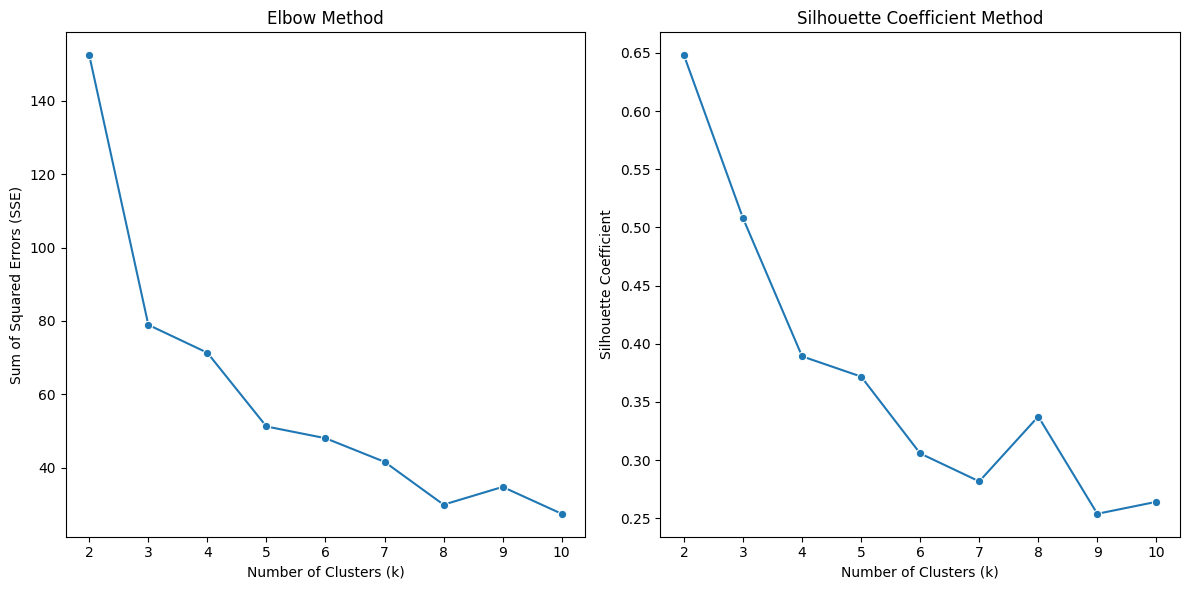

In [3]:
# Convert results to a DataFrame for easier plotting
results_df=pd.DataFrame(results)

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a line plot for SSE
plt.subplot(1, 2, 1)
sns.lineplot(x='k', y='sse', data=results_df, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')

# Create a line plot for Silhouette Coefficient
plt.subplot(1, 2, 2)
sns.lineplot(x='k', y='silhouette', data=results_df, marker='o')
plt.title('Silhouette Coefficient Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


PART B

In [ ]:
def kmeans_fixedK_with_labels(X, max_iters=100):
    #get k from no. of labels from iris
    k=len(np.unique(iris['Species']))
    #now choose k centroids based on labels from the iris points(K-medoid)
    


    for _ in range(max_iters):
        clusters=[[] for _ in range(k)]
        for point in X:
            distances=[euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx=np.argmin(distances)
            clusters[cluster_idx].append(point)
        
        new_centroids=[np.mean(cluster, axis=0) for cluster in clusters]
        
        if np.all([np.allclose(centroids[i], new_centroids[i]) for i in range(k)]):
            break
        
        centroids=new_centroids
    
    return centroids, clusters